In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.integrate import odeint
"""Import modules"""
from rhozy_code import bug #This is the import one
# from rhozy_code_38 import bug #Depending on your version of python
import numpy as np
from scipy.integrate import odeint
from matplotlib import pyplot as plt
import sys
sys.version

'3.7.7 (default, May  6 2020, 11:45:54) [MSC v.1916 64 bit (AMD64)]'

In [57]:
""" Time """
# Using a set number of increments per hour is useful to achieve smooth profiles without errors
# If an error occurs during the integration try varying the number of increments, usually too few can cause an error.
time = 25
tspan = np.linspace(0,time,time*10 + 1)

""" Initial parameters """
Cso,Cxo,Cfo,Ceo,Cno =  1, 0.1, 0, 0, 0.2  # Cmol/L (Cn is in mole nitrogen)
V = 1# L
Q = 0 # L/h
Csf,Cxf,Cff,Cef,Cnf = 0,0,0,0,0  # Cmol/L

""" Response function"""
bug([Cso,Cxo,Cfo,Ceo,Cno],Q,V,Csf) #This will return the rates at the conditions specified

(-0.4130434782608696,
 0.09045680687471731,
 0.0,
 0.18620269221572727,
 -0.018091361374943465)

Questions section

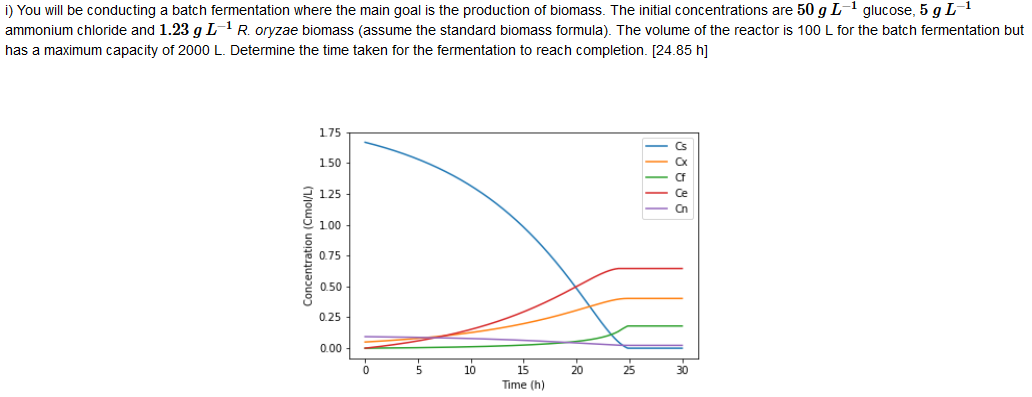

<IPython.core.display.Javascript object>


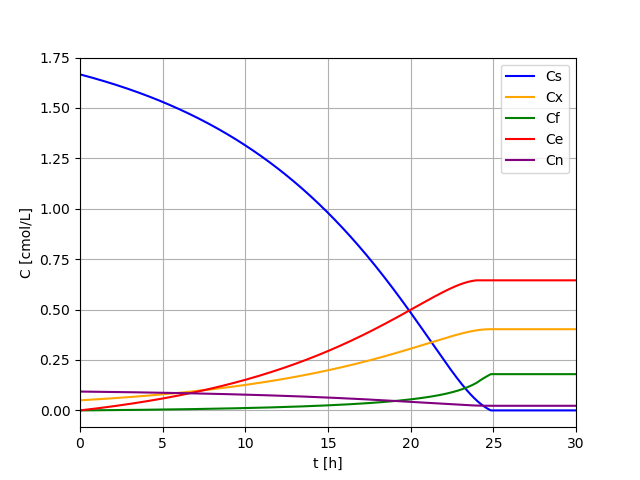

fermentation end time: 24.852426213106554 h


In [14]:
MM_x=(10*(12)+18*(1)+5*(16)+2*(14))/10 #g/cmol
C_i=[50/30,1.23/MM_x,0,0,5/53.5] #cmol/L
C_f=[0,0,0,0,0] #cmol/L
V=100 #L
Q=0
tmax=30
#####################################################
def resp_fn(C):
    r= bug(C,Q,V,Csf)
    return r
def ferm_fn(C,t):
    Cx=C[1]
    rs,rx,rf,re,rn=resp_fn(C)
    return [rs*Cx,
            rx*Cx,
            rf*Cx,
            re*Cx,
            rn*Cx]
##############################################
tspan=np.linspace(0,tmax,2000)
Cs,Cx,Cf,Ce,Cn=odeint(ferm_fn,C_i,tspan).T
##############################################
%matplotlib notebook
plt.figure(0)
plt.plot(tspan, Cs, 'b', label = "Cs")
plt.plot(tspan, Cx, 'orange', label = "Cx")
plt.plot(tspan, Cf, 'g', label = "Cf")
plt.plot(tspan, Ce, 'r', label = "Ce")
plt.plot(tspan, Cn, 'purple', label = "Cn")
plt.xlabel("t [h]")
plt.ylabel("C [cmol/L]")
plt.xlim(0,tmax)
plt.grid(True)
plt.legend(loc = "best")
#############################################
for i,Cs_at_t in enumerate(Cs):
    if (Cs_at_t<1e-10):
        print("fermentation end time:",tspan[i],"h")
        break

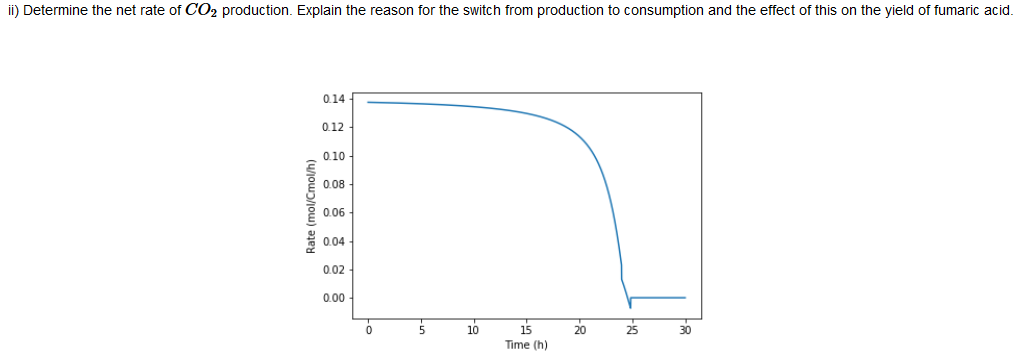

<IPython.core.display.Javascript object>


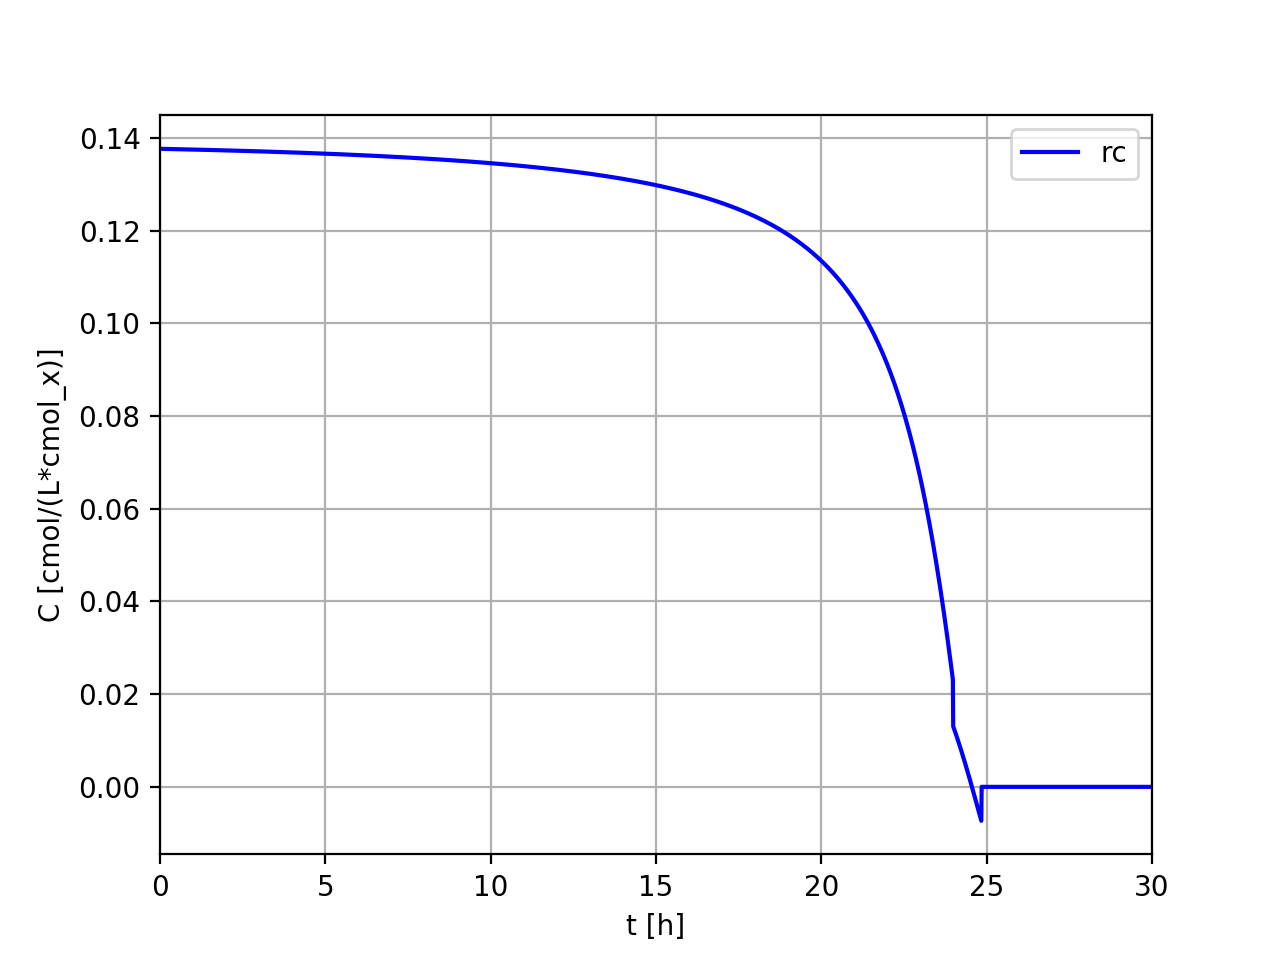

In [27]:
MM_x=(10*(12)+18*(1)+5*(16)+2*(14))/10 #g/cmol
C_i=[50/30,1.23/MM_x,0,0,5/53.5] #cmol/L
C_f=[0,0,0,0,0] #cmol/L
V=100 #L
Q=0
alpha=0.1
tmax=30
#####################################################
def resp_fn(C):
    r= bug(C,1,1,1)
    return r
def ferm_fn(C,t):
    Cx=C[1]
    rs,rx,rf,re,rn=resp_fn(C)
    return [rs*Cx,
            rx*Cx,
            rf*Cx,
            re*Cx,
            rn*Cx]
##############################################
tspan=np.linspace(0,tmax,3000)
C=odeint(ferm_fn,C_i,tspan)
rc_arr=[]
for i,t in enumerate(tspan):
    rs,rx,rf,re,rn=resp_fn(C[i])
    rc=-rs-rx-rf-re
    #rc=alpha*rx+(-rs-rx*(alpha+1))-rf-(1/4)*rf
    rc_arr.append(rc)
##############################################
%matplotlib notebook
plt.figure(0)
plt.plot(tspan, rc_arr, 'b', label = "rc")
plt.xlabel("t [h]")
plt.ylabel("C [cmol/(L*cmol_x)]")
plt.xlim(0,tmax)
plt.grid(True)
plt.legend(loc = "best")

# Optimisation
## Optimal growth Cs (for highest mu)
## Batch fermentation to see at what Cs ethanol production starts

<IPython.core.display.Javascript object>


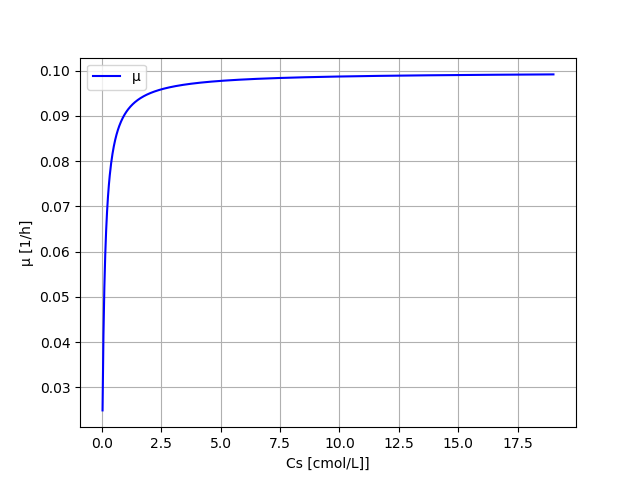

In [5]:
"""1.1"""
#############################################
MM_s=180/6 #g/cmol
MM_x=(10*(12)+18*(1)+5*(16)+2*(14))/10 #g/cmol
MM_f=116/4 #g/cmol
MM_e=46/2 #g/cmol
MM_n=53.5/1 #g/cmol

Cx=1.23/MM_x #cmol/L
Cf=10/MM_f #cmol/L
Ce=10/MM_f #cmol/L
Cn=10/MM_f #cmol/L
#############################################
Cs_arr=np.linspace(1,570,1000)/MM_s #g/L
mu_arr=[]
for i,Cs in enumerate(Cs_arr):
    r=bug([Cs,Cx,Cf,Ce,Cn],1,1,1)
    mu_arr.append(r[1])
#############################################
%matplotlib notebook
plt.figure(0)
plt.plot(Cs_arr, mu_arr, 'b', label = "μ")
plt.xlabel("Cs [cmol/L]]")
plt.ylabel("μ [1/h]")
plt.grid(True)
plt.legend(loc = "best")
plt.savefig("Cs_mu.png")

C:\Users\Ang\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


<IPython.core.display.Javascript object>


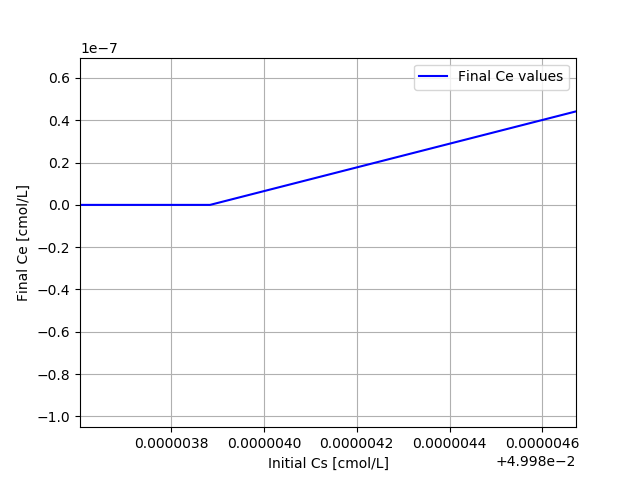

In [13]:
"""1.3"""
#####################################################
MM_x=(10*(12)+18*(1)+5*(16)+2*(14))/10 #g/cmol
MM_s=180/6 #g/cmol
#####################################################
C_i=[None,1.23/MM_x,0,0,5/53.5] #cmol/L
C_f=[0,0,0,0,0] #cmol/L
tmax=10
######################################################
def resp_fn(C):
    r= bug(C,1,1,1)
    return r
def ferm_fn(C,t):
    Cx=C[1]
    rs,rx,rf,re,rn=resp_fn(C)
    return [rs*Cx,
            rx*Cx,
            rf*Cx,
            re*Cx,
            rn*Cx]
##############################################
tspan=np.linspace(0,tmax,1000)
Cs_i_arr=np.linspace(0.01,3,3000)/MM_s
Ce_final_arr=[]
for i,Cs_i in enumerate(Cs_i_arr):
    C_i[0]=Cs_i
    Cs,Cx,Cf,Ce,Cn=odeint(ferm_fn,C_i,tspan).T
    Ce_final_arr.append(Ce[-1])
##############################################
%matplotlib notebook
plt.figure(0)
plt.plot(Cs_i_arr, Ce_final_arr, 'b', label = "Final Ce values")
plt.xlabel("Initial Cs [cmol/L]")
plt.ylabel("Final Ce [cmol/L]")
plt.grid(True)
plt.legend(loc = "best")
plt.savefig("Cs_i_Ce_f.png")

# __Design section__
## fed batch with Q optimal formula 
## literature method: fed batch with growth and production phases
## fed batch with Q defined by consumption rate


fermentation end time: 41.20824164832967 h
OF: -226.5173560633049


<IPython.core.display.Javascript object>


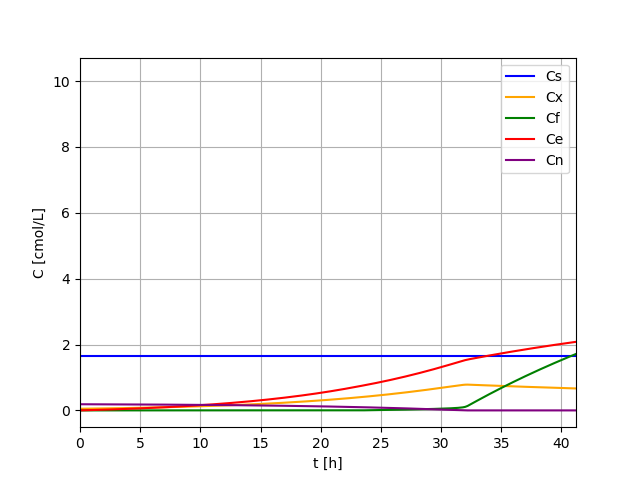

In [70]:
"""2.1"""
#############################################
"""other constants"""
MM_s=180/6 #g/cmol
MM_x=(10*(12)+18*(1)+5*(16)+2*(14))/10 #g/cmol
MM_f=116/4 #g/cmol
MM_e=46/2 #g/cmol
MM_n=53.5/1 #g/cmol
tmax=1000
"""fermenter specifications"""
C_i=[50/MM_s,1.23/MM_x,0/MM_f,0/MM_e,10/MM_n] #cmol/L
C_f=[570/MM_s,0/MM_x,0/MM_f,0/MM_e,0/MM_n] #cmol/L
V_i=100 #L
t_replacement=15 #h (Cx is kept, all other concentrations specified again)
C_r=[0,None,0,0,0] #cmol/L (concentrations of displacement, other than Cx)
"""design constraints"""
Cf_end=50/MM_f #cmol/L
#V: 100L to 2000L
#Cs_f max: 570 g/L
##############################################
def ferm_fn(N,t):
    Cs,Cx,Cf,Ce,Cn,V=N[0]/N[5],N[1]/N[5],N[2]/N[5],N[3]/N[5],N[4]/N[5],N[5]
    rs,rx,rf,re,rn=bug([Cs,Cx,Cf,Ce,Cn],1,1,1)#response function [rates: cmol_i/(h*cmol_x)]
    Q=rs*Cx*V/(Cs-C_f[0])
    return [Q*C_f[0]+rs*Cx*V,#glucose
            Q*C_f[1]+rx*Cx*V,#biomass
            Q*C_f[2]+rf*Cx*V,#fumaric acid
            Q*C_f[3]+re*Cx*V,#ethanol
            Q*C_f[4]+rn*Cx*V,#ammonium chloride
            Q,#get volume
            Q*C_f[0]]#get total glucose fed
##############################################
"""integration"""
tspan=np.linspace(0,tmax,5000)
N_i=list(np.array(C_i)*V_i)+[V_i]+[0]
Ns,Nx,Nf,Ne,Nn,V,Ns_fed=odeint(ferm_fn,N_i,tspan).T
Cs,Cx,Cf,Ce,Cn=np.array(Ns)/V,np.array(Nx)/V,np.array(Nf)/V,np.array(Ne)/V,np.array(Nn)/V
##############################################
"""OF calculation"""
for i,t in enumerate(tspan):
    t_end=0
    if (abs(Cf[i]-Cf_end)<=1e-2):
        t_end=t
        i_end=i
        break
if (t_end>0):
    P=Cf_end*MM_f/t_end#g/(L*h)
    total_s=C_i[0]*V_i+Ns_fed[i_end]#cmol
    yield_f=(Cf_end*V[i_end]/total_s)*(MM_f/MM_s)#g/g
    yield_e=(Ce[i_end]*V[i_end]/total_s)*(MM_e/MM_s)#g/g
    OF=239.43*P*yield_f**2-1100*yield_e
##############################################
"""output"""
if (t_end>0):
    print("fermentation end time:",t_end,"h")
    print("OF:",OF)
    %matplotlib notebook
    plt.figure(0)
    plt.plot(tspan, Cs, 'b', label = "Cs")
    plt.plot(tspan, Cx, 'orange', label = "Cx")
    plt.plot(tspan, Cf, 'g', label = "Cf")
    plt.plot(tspan, Ce, 'r', label = "Ce")
    plt.plot(tspan, Cn, 'purple', label = "Cn")
    plt.xlabel("t [h]")
    plt.ylabel("C [cmol/L]")
    plt.xlim(0,t_end)
    plt.grid(True)
    plt.legend(loc = "best")
else:
    print("fermentation did not reach fumaric acid specification.")


fermentation end time: 85.878 h
OF: -75.95528366456782


<IPython.core.display.Javascript object>


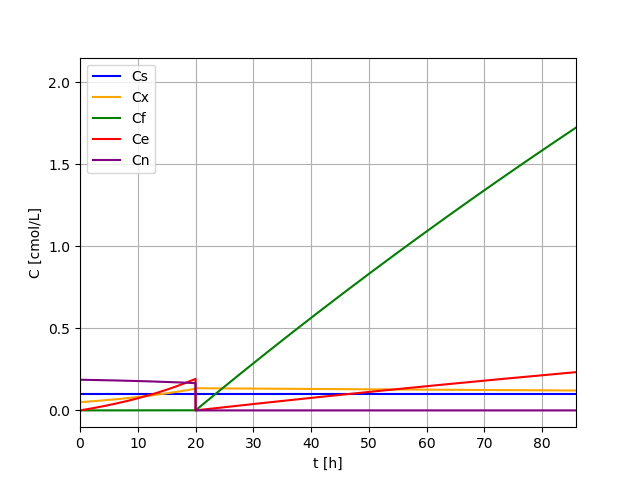

In [71]:
"""2.2"""
#############################################
"""other constants"""
MM_s=180/6 #g/cmol
MM_x=(10*(12)+18*(1)+5*(16)+2*(14))/10 #g/cmol
MM_f=116/4 #g/cmol
MM_e=46/2 #g/cmol
MM_n=53.5/1 #g/cmol
tmax=500
resolution=1e-3

"""design constraints"""
Cf_end=50/MM_f #cmol/L
mass_i_x=123 #g #Starting biomass: 123g
#V: 100L to 2000L
#Cs_f max: 570 g/L

"""fermenter specifications"""
#growth phase
V_i_growth=100 #L
C_i_growth=[1.499999/MM_s,mass_i_x/(V_i_growth*MM_x),0/MM_f,0/MM_e,50/MM_n] #cmol/L #1.499916
C_f_growth=[570/MM_s,0/MM_x,0/MM_f,0/MM_e,0/MM_n] #cmol/L

#production phase
t_prod=36.3 #h (Production phase. Cx is kept, all other concentrations specified again) 36.3
V_i_prod=100 #L
C_i_prod=[1.499999/MM_s,None,0/MM_f,0/MM_e,0/MM_n] #cmol/L 
C_f_prod=[570/MM_s,0/MM_x,0/MM_f,0/MM_e,0/MM_n] #cmol/L

##############################################
def ferm_fn(N,t,C_f):
    Cs,Cx,Cf,Ce,Cn,V=N[0]/N[5],N[1]/N[5],N[2]/N[5],N[3]/N[5],N[4]/N[5],N[5]
    rs,rx,rf,re,rn=bug([Cs,Cx,Cf,Ce,Cn],1,1,1)#response function
    #Q=(V*0.07)/(C_f[0]*MM_s)
    Q=rs*Cx*V/(Cs-C_f[0])
    return [Q*C_f[0]+rs*Cx*V,#glucose
            Q*C_f[1]+rx*Cx*V,#biomass
            Q*C_f[2]+rf*Cx*V,#fumaric acid
            Q*C_f[3]+re*Cx*V,#ethanol
            Q*C_f[4]+rn*Cx*V,#ammonium chloride
            Q,#get volume
            Q*C_f[0]]#get total glucose fed      
##############################################
"""integration"""
#growth
tspan_growth=np.arange(0,t_prod,resolution)
N_i_growth=list(np.array(C_i_growth)*V_i_growth)+[V_i_growth]+[0]
Ns_growth,Nx_growth,Nf_growth,Ne_growth,Nn_growth,V_growth,Ns_fed_growth=odeint(ferm_fn,N_i_growth,tspan_growth,args=(C_f_growth,)).T

Cs_growth=list(Ns_growth/V_growth)
Cx_growth=list(Nx_growth/V_growth)
Cf_growth=list(Nf_growth/V_growth)
Ce_growth=list(Ne_growth/V_growth)
Cn_growth=list(Nn_growth/V_growth)

#production
tspan_prod=np.arange(t_prod,tmax,resolution)
N_i_prod=[C_i_prod[0]*V_i_prod]+[Nx_growth[-1]]+list(np.array(C_i_prod[2:5])*V_i_prod)+[V_i_prod]+[Ns_fed_growth[-1]] #includes biomass from growth
Ns_prod,Nx_prod,Nf_prod,Ne_prod,Nn_prod,V_prod,Ns_fed_prod=odeint(ferm_fn,N_i_prod,tspan_prod,args=(C_f_prod,)).T

Cs_prod=list(Ns_prod/V_prod)
Cx_prod=list(Nx_prod/V_prod)
Cf_prod=list(Nf_prod/V_prod)
Ce_prod=list(Ne_prod/V_prod)
Cn_prod=list(Nn_prod/V_prod)
                
#growth+production
tspan=np.arange(0,tmax,resolution)
Cs=Cs_growth+Cs_prod
Cx=Cx_growth+Cx_prod
Cf=Cf_growth+Cf_prod
Ce=Ce_growth+Ce_prod
Cn=Cn_growth+Cn_prod
V=list(V_growth)+list(V_prod)
Ns_fed=list(Ns_fed_growth)+list(Ns_fed_prod)
##############################################
"""OF calculation"""
#assumes that no fumaric acid produced in growth phase
for i,t in enumerate(tspan):
    t_end=0
    if (abs(Cf[i]-Cf_end)<=1e-3):
        t_end=t
        i_end=i
        break
if (t_end>0):
    P=Cf_end*MM_f/t_end#g/(L*h)
    total_s=C_i_growth[0]*V_i_growth+C_i_prod[0]*V_i_prod+Ns_fed[i_end]#cmol
    yield_f=(Cf_end*V[i_end]/total_s)*(MM_f/MM_s)#g/g
    yield_e=((Ce_growth[-1]*V_growth[-1]+Ce[i_end]*V[i_end])/total_s)*(MM_e/MM_s)#g/g
    OF=239.43*P*yield_f**2-1100*yield_e
##############################################
"""output"""
if (t_end>0):
    print("fermentation end time:",t_end,"h")
    print("OF:",OF)
    %matplotlib notebook
    plt.figure(0)
    plt.plot(tspan,Cs,'b',label="Cs")
    plt.plot(tspan,Cx,'orange',label="Cx")
    plt.plot(tspan,Cf,'g',label="Cf")
    plt.plot(tspan,Ce,'r',label="Ce")
    plt.plot(tspan,Cn,'purple',label="Cn")
    plt.xlabel("t [h]")
    plt.ylabel("C [cmol/L]")
    plt.xlim(0,t_end)
    plt.grid(True)
    plt.legend(loc="best")
else:
    print("fermentation did not reach fumaric acid specification.")
    %matplotlib notebook
    plt.figure(0)
    plt.plot(tspan,Cs,'b',label="Cs")
    plt.plot(tspan,Cx,'orange',label="Cx")
    plt.plot(tspan,Cf,'g',label="Cf")
    plt.plot(tspan,Ce,'r',label="Ce")
    plt.plot(tspan,Cn,'purple',label="Cn")
    plt.xlabel("t [h]")
    plt.ylabel("C [cmol/L]")
    plt.xlim(0,tmax)
    plt.grid(True)
    plt.legend(loc="best")

Fermentation end time: 91.976 h
Final volume 109.34746970831785 L
Productivity: 0.5436200748021223 g/(L*h)
Fumarate yield: 0.8765254589742474 g/g
Ethanol yield: 0.0 g/g
OF: 100.0007186839352
Total CO2 produced: -2.7695294992999298 mol
Total O2 consumed: 3.83681776729791 mol


<IPython.core.display.Javascript object>


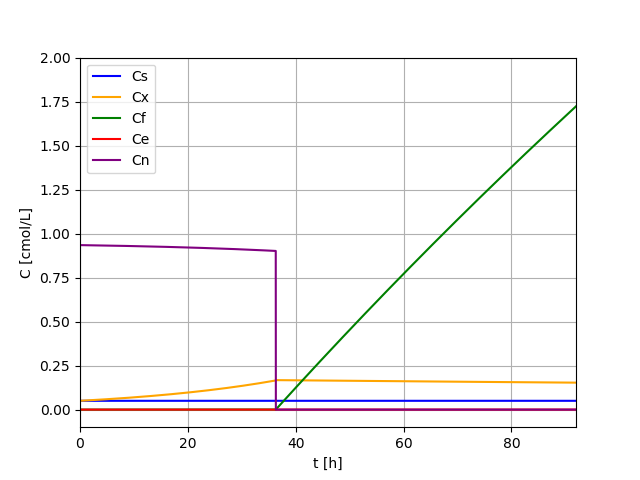

In [30]:
"""2.2_dummy"""
#############################################
"""other constants"""
MM_s=180/6 #g/cmol
MM_x=(10*(12)+18*(1)+5*(16)+2*(14))/10 #g/cmol
MM_f=116/4 #g/cmol
MM_e=46/2 #g/cmol
MM_n=53.5/1 #g/cmol
alpha=0.1 #mol/cmol_x
beta=0.1 #mol/cmol_x
tmax=500
resolution=1e-3

"""design constraints"""
Cf_end=50/MM_f #cmol/L
mass_i_x=123 #g #Starting biomass: 123g
#V: 100L to 2000L
#Cs_f max: 570 g/L

"""fermenter specifications"""
#growth phase
V_i_growth=100 #L
C_i_growth=[1.499999/MM_s,mass_i_x/(V_i_growth*MM_x),0/MM_f,0/MM_e,50/MM_n] #cmol/L #1.499916
C_f_growth=[570/MM_s,0/MM_x,0/MM_f,0/MM_e,0/MM_n] #cmol/L

#production phase
t_prod=36.3 #h (Production phase. Cx is kept, all other concentrations specified again) 36.3
V_i_prod=100 #L
C_i_prod=[1.499999/MM_s,None,0/MM_f,0/MM_e,0/MM_n] #cmol/L 
C_f_prod=[570/MM_s,0/MM_x,0/MM_f,0/MM_e,0/MM_n] #cmol/L

##############################################
def ferm_fn(N,t,C_f):
    Cs,Cx,Cf,Ce,Cn,V=N[0]/N[5],N[1]/N[5],N[2]/N[5],N[3]/N[5],N[4]/N[5],N[5]
    rs,rx,rf,re,rn=bug([Cs,Cx,Cf,Ce,Cn],1,1,1)#response function
    rco2=-rs-rx-rf #co2 production rate
    #rco2=alpha*rx+(-rs-rx*(alpha+1))-rf-(1/4)*rf
    ro2=(beta*rx+(7/3)*(-rs-rx*(alpha+1))-(9/4)*rf)/2 #o2 rate
    Q=rs*Cx*V/(Cs-C_f[0])
    return [Q*C_f[0]+rs*Cx*V,#glucose
            Q*C_f[1]+rx*Cx*V,#biomass
            Q*C_f[2]+rf*Cx*V,#fumaric acid
            Q*C_f[3]+re*Cx*V,#ethanol
            Q*C_f[4]+rn*Cx*V,#ammonium chloride
            Q,#get volume
            Q*C_f[0],#total glucose fed 
            rco2*Cx*V,#co2 produced
            ro2*Cx*V]#o2 used
##############################################
"""integration"""
#growth
tspan_growth=np.arange(0,t_prod,resolution)
N_i_growth=list(np.array(C_i_growth)*V_i_growth)+[V_i_growth]+[0,0,0]
Ns_growth,Nx_growth,Nf_growth,Ne_growth,Nn_growth,V_growth,Ns_fed_growth,Nco2_growth,No2_growth=odeint(ferm_fn,N_i_growth,tspan_growth,args=(C_f_growth,)).T

Cs_growth=list(Ns_growth/V_growth)
Cx_growth=list(Nx_growth/V_growth)
Cf_growth=list(Nf_growth/V_growth)
Ce_growth=list(Ne_growth/V_growth)
Cn_growth=list(Nn_growth/V_growth)

#production
tspan_prod=np.arange(t_prod,tmax,resolution)
N_i_prod=[C_i_prod[0]*V_i_prod]+[Nx_growth[-1]]+list(np.array(C_i_prod[2:5])*V_i_prod)+[V_i_prod]+[Ns_fed_growth[-1]]+[Nco2_growth[-1]]+[No2_growth[-1]] #includes biomass from growth
Ns_prod,Nx_prod,Nf_prod,Ne_prod,Nn_prod,V_prod,Ns_fed_prod,Nco2_prod,No2_prod=odeint(ferm_fn,N_i_prod,tspan_prod,args=(C_f_prod,)).T

Cs_prod=list(Ns_prod/V_prod)
Cx_prod=list(Nx_prod/V_prod)
Cf_prod=list(Nf_prod/V_prod)
Ce_prod=list(Ne_prod/V_prod)
Cn_prod=list(Nn_prod/V_prod)
                
#growth+production
tspan=np.arange(0,tmax,resolution)
Cs=Cs_growth+Cs_prod
Cx=Cx_growth+Cx_prod
Cf=Cf_growth+Cf_prod
Ce=Ce_growth+Ce_prod
Cn=Cn_growth+Cn_prod
V=list(V_growth)+list(V_prod)
Ns_fed=list(Ns_fed_growth)+list(Ns_fed_prod)
Nco2=list(Nco2_growth)+list(Nco2_prod)
No2=list(No2_growth)+list(No2_prod)
##############################################
"""OF calculation"""
#assumes that no fumaric acid produced in growth phase
for i,t in enumerate(tspan):
    t_end=0
    if (abs(Cf[i]-Cf_end)<=1e-3):
        t_end=t
        i_end=i
        break
if (t_end>0):
    P=Cf_end*MM_f/t_end#g/(L*h)
    total_s=C_i_growth[0]*V_i_growth+C_i_prod[0]*V_i_prod+Ns_fed[i_end]#cmol
    yield_f=(Cf_end*V[i_end]/total_s)*(MM_f/MM_s)#g/g
    yield_e=((Ce_growth[-1]*V_growth[-1]+Ce[i_end]*V[i_end])/total_s)*(MM_e/MM_s)#g/g
    OF=239.43*P*yield_f**2-1100*yield_e
##############################################
"""output"""
if (t_end>0):
    print("Fermentation end time:",t_end,"h")
    print("Final volume",V[i_end],"L")
    print("Productivity:",P,"g/(L*h)")
    print("Fumarate yield:",yield_f,"g/g")
    print("Ethanol yield:",yield_e,"g/g")
    print("OF:",OF)
    print("Total CO2 produced:",Nco2[i_end],"mol")
    print("Total O2 consumed:",No2[i_end],"mol")
    %matplotlib notebook
    plt.figure(0)
    plt.xlabel("t [h]")
    plt.ylabel("C [cmol/L]")
    plt.xlim(0,t_end)
    plt.ylim(-0.1,2)
    plt.grid(True)
    plt.plot(tspan,Cs,'b',label="Cs")
    plt.plot(tspan,Cx,'orange',label="Cx")
    plt.plot(tspan,Cf,'g',label="Cf")
    plt.plot(tspan,Ce,'r',label="Ce")
    plt.plot(tspan,Cn,'purple',label="Cn")
    plt.legend(loc="best")
    plt.savefig("final_ferm.png")
else:
    print("fermentation did not reach fumaric acid specification.")
    %matplotlib notebook
    plt.figure(0)
    plt.xlabel("t [h]")
    plt.ylabel("C [cmol/L]")
    plt.xlim(0,tmax)
    plt.ylim(-0.1,2)
    plt.grid(True)
    plt.plot(tspan,Cs,'b',label="Cs")
    plt.plot(tspan,Cx,'orange',label="Cx")
    plt.plot(tspan,Cf,'g',label="Cf")
    plt.plot(tspan,Ce,'r',label="Ce")
    plt.plot(tspan,Cn,'purple',label="Cn")
    plt.legend(loc="best")